<a href="https://colab.research.google.com/github/rajskar/um_P710/blob/main/LinearRegression/LR_MSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calculated Coefficients:
  Intercept (beta_0): 4.2151
  Slope (beta_1): 2.7701


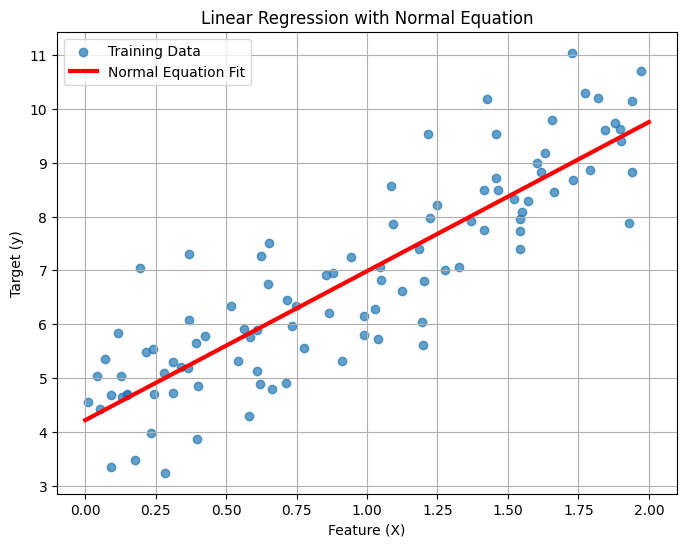

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Define the Normal Equation solver function ---
def normal_equation_solve(X, y):
    """
    Calculates the coefficients for a linear regression model
    using the Normal Equation.

    The formula is: beta_hat = (X^T * X)^-1 * X^T * y

    Args:
        X (np.array): The feature matrix of shape (m, n), where m is the
                      number of samples and n is the number of features.
        y (np.array): The target vector of shape (m, 1).

    Returns:
        np.array: A vector of coefficients (beta_0, beta_1, ..., beta_n).
    """
    # Get the number of samples (m)
    m = X.shape[0]

    # Add a column of ones to X for the intercept term (beta_0).
    # This is often referred to as the "design matrix".
    X_b = np.c_[np.ones((m, 1)), X]

    # Calculate the components of the Normal Equation
    # 1. (X^T * X)
    try:
        XT_X = X_b.T @ X_b
        # 2. (X^T * X)^-1
        XT_X_inv = np.linalg.inv(XT_X)
    except np.linalg.LinAlgError:
        # Handle the case where the matrix is not invertible (e.g., multicollinearity)
        print("Error: The matrix (X^T * X) is not invertible.")
        return None

    # 3. (X^T * y)
    XT_y = X_b.T @ y

    # 4. Final calculation: beta_hat = (X^T * X)^-1 * X^T * y
    beta_hat = XT_X_inv @ XT_y

    return beta_hat

# --- Step 2: Generate sample data ---
# This data simulates a simple linear relationship with some random noise.
# We'll use a single feature for easy visualization.
np.random.seed(42)  # For reproducibility
X_train = 2 * np.random.rand(100, 1)
y_train = 4 + 3 * X_train + np.random.randn(100, 1)

# --- Step 3: Solve for the coefficients using the Normal Equation ---
beta = normal_equation_solve(X_train, y_train)

# Check if the solution was successful
if beta is not None:
    # Print the coefficients
    intercept = beta[0][0]
    slope = beta[1][0]
    print(f"Calculated Coefficients:")
    print(f"  Intercept (beta_0): {intercept:.4f}")
    print(f"  Slope (beta_1): {slope:.4f}")

    # Compare with the true values: intercept was 4, slope was 3.
    # The calculated values are close to the true values, but not exact
    # due to the random noise added to the data.

    # --- Step 4: Visualize the results ---
    # Create new data points for plotting the regression line
    X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
    # The prediction is y = intercept + slope * X
    y_pred = intercept + slope * X_plot

    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, y_train, label='Training Data', alpha=0.7)
    plt.plot(X_plot, y_pred, color='red', linewidth=3, label='Normal Equation Fit')
    plt.title('Linear Regression with Normal Equation')
    plt.xlabel('Feature (X)')
    plt.ylabel('Target (y)')
    plt.legend()
    plt.grid(True)
    plt.show()

